# Batting Performance Index
- Combines features (`Swing_Speed`, `Reaction_Time`, `Grip_Pressure`, `Heart_Rate`) with weights to calculate a normalized score for batting performance.
- `Reaction_Time` has a significant weight (30%) and inversely affects performance (lower values are better).

In [36]:
import pandas as pd
import numpy as np

batting_data = pd.read_csv("batting_data.csv")

batting_data['Performance_Index'] = (
    batting_data['Swing_Speed'] * 0.6 +
    (- batting_data['Reaction_Time']) * 0.3 +
    batting_data['Grip_Pressure'] * 0.5 +
    ( - batting_data['Heart_Rate']) * 0.3
)

# Normalize the Performance Index to 0-100 scale
batting_data['Performance_Index'] = (
    (batting_data['Performance_Index'] - batting_data['Performance_Index'].min()) /
    (batting_data['Performance_Index'].max() - batting_data['Performance_Index'].min()) * 100
)


print(batting_data.head())

   Heart_Rate  Reaction_Time  Swing_Speed  Grip_Pressure  Performance_Index
0  131.561228     511.922336    30.984465      12.794999          37.552288
1  136.509894     506.337272    26.753823      32.364918          43.790837
2  120.617699     509.335920    27.824309      14.804223          40.209179
3  119.911399     535.069442    20.296707      21.359182          32.872011
4   99.565878     435.914512    33.000378      37.040039          75.913021


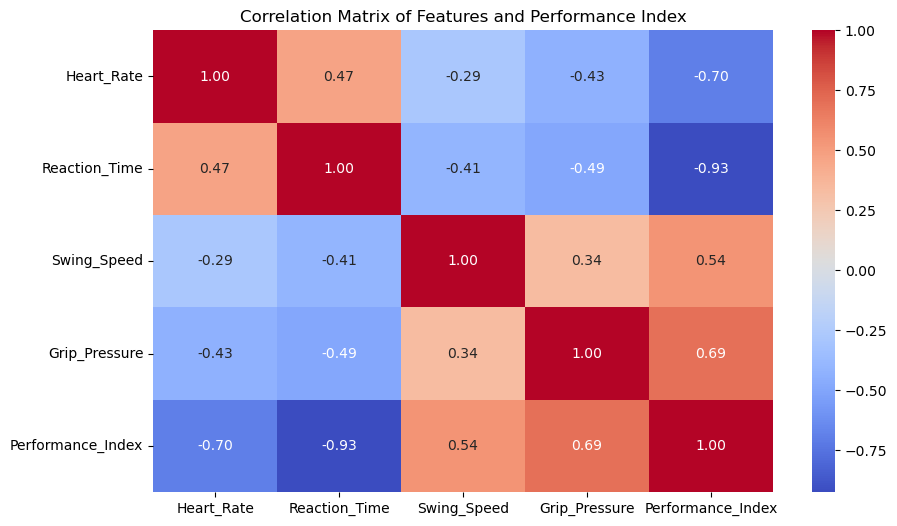

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
correlation_matrix = batting_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features and Performance Index")
plt.show()

## Linear Regression 

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X = batting_data[['Heart_Rate', 'Reaction_Time', 'Swing_Speed', 'Grip_Pressure']]
X_scaled = scaler.fit_transform(X)

# Train-Test Split
y = batting_data['Performance_Index']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

# Evaluating the Model
print("\nLinear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Coefficients
coefficients = pd.DataFrame({
    'Feature': ['Heart_Rate', 'Reaction_Time', 'Swing_Speed', 'Grip_Pressure'],
    'Coefficient': linear_model.coef_
})
print("\nLinear Regression Coefficients:")
print(coefficients)


Linear Regression Results:
Mean Squared Error: 6.9527648714189655e-28
R-squared: 1.0

Linear Regression Coefficients:
         Feature  Coefficient
0     Heart_Rate    -4.972355
1  Reaction_Time   -11.936036
2    Swing_Speed     2.434548
3  Grip_Pressure     4.011497


### Linear Regression Results:
   - **Coefficient for Reaction_Time is the largest** because it has the strongest influence on the performance based on the formula.
   - The target variable is deterministically derived from the input feature and that's MSE is very close to 0 and R-squared is 1. 



## Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Results:")
print("Mean Squared Error (RF):", mean_squared_error(y_test, y_pred_rf))
print("R-squared (RF):", r2_score(y_test, y_pred_rf))

# Feature Importance for Random Forest
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Random Forest):")
print(feature_importances)



Random Forest Results:
Mean Squared Error (RF): 7.010958859364329
R-squared (RF): 0.9798019088484323

Feature Importance (Random Forest):
         Feature  Importance
1  Reaction_Time    0.859838
0     Heart_Rate    0.076275
3  Grip_Pressure    0.048949
2    Swing_Speed    0.014938


### Random Forest Results
   - Confirms that `Reaction_Time` dominates the predictions with feature importance.
   - Handles potential non-linearities but slightly underperforms compared to Linear Regression due to its approximations.

The results emphasize improving reaction time during training as it has the most significant impact on performance according to the data. 